In [60]:
import math
# Carga del electrón en coulombs
e = 1.602176634e-19  # coulombs

# Permitividad del vacío en coulombs^2 / (N m^2)
e0 = 8.854187817e-12  # C^2 / (N m^2)

In [61]:
import pandas as pd

# Ruta al archivo .dat
archivo_dat = 'mycoulomb.dat'

# Crear el DataFrame desde el archivo .dat
df = pd.read_csv(archivo_dat, sep='\s+', header=None, names=['Z', 'Delta_EC'])

# Convertir la columna 'Delta_EC' a tipo numérico
df['Delta_EC'] = pd.to_numeric(df['Delta_EC'], errors='coerce')

# Multiplicar todos los valores de la columna 'Delta_EC' por 0.0001
df['Delta_EC'] = df['Delta_EC'] * 0.001

# Eliminar las dos últimas filas
df = df.drop(df.tail(2).index)

# Mostrar el DataFrame actualizado
df

,Z,Delta_EC
0,3,0.763764
1,5,1.072000
2,7,1.644000
3,9,1.850000
4,11,2.765000
5,13,3.003000
6,15,3.536000
7,17,3.543000
8,19,4.021000
9,21,4.330000


Intercepto: -0.9291234424046197
Constante asociada al radio nuclear: 0.7076157678883706


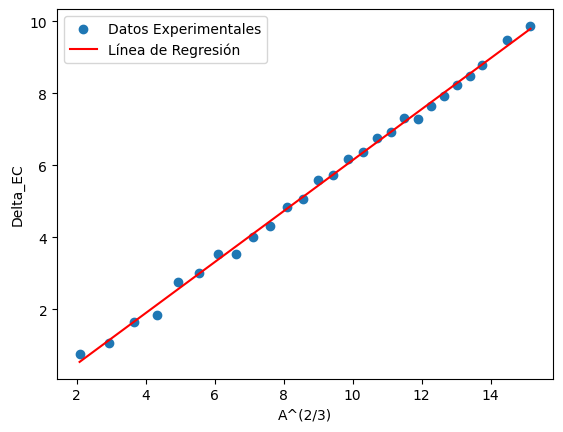

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Convertir las columnas 'Z' y 'Delta_EC' a números
df['Z'] = pd.to_numeric(df['Z'], errors='coerce')
df['Delta_EC'] = pd.to_numeric(df['Delta_EC'], errors='coerce')

# Eliminar filas con valores nulos, si los hay
df = df.dropna()

# Calcular A^(2/3)
df['A^(2/3)'] = df['Z']**(2/3)

# Crear un array 1D para las variables independientes (x) y dependientes (y)
x = df['A^(2/3)'].values
y = df['Delta_EC'].values

# Ajustar un polinomio de grado 1 (regresión lineal)
coeficientes = np.polyfit(x, y, deg=1)

# Imprimir los resultados
intercepto = coeficientes[1]
constante = coeficientes[0]
print(f'Intercepto: {intercepto}')
print(f'Constante asociada al radio nuclear: {constante}')

# Crear una gráfica de Delta_EC vs A^(2/3)
plt.scatter(x, y, label='Datos Experimentales')
plt.plot(x, np.polyval(coeficientes, x), color='red', label='Línea de Regresión')
plt.xlabel('A^(2/3)')
plt.ylabel('Delta_EC')
plt.legend()
plt.show()



Intercepto: -0.9291234424046197
Constante asociada al radio nuclear: 0.7076157678883706


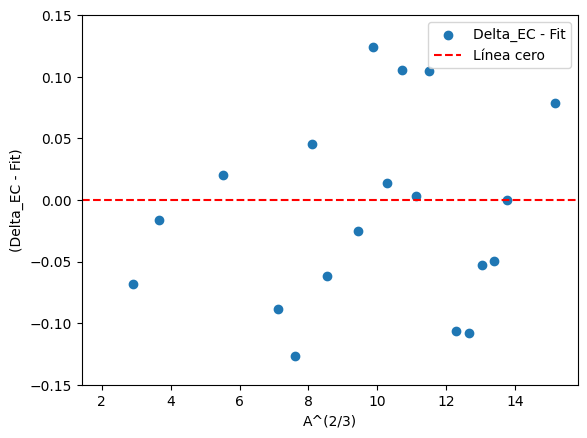

In [63]:
# Calcular los valores Fit (predicciones de la regresión)
fit = np.polyval(coeficientes, x)

# Calcular (Delta_EC - Fit)
df['Delta_EC - Fit'] = df['Delta_EC'] - fit

# Imprimir los resultados
intercepto = coeficientes[1]
constante = coeficientes[0]
print(f'Intercepto: {intercepto}')
print(f'Constante asociada al radio nuclear: {constante}')

# Crear una gráfica de Delta_EC vs A^(2/3)
plt.scatter(x, df['Delta_EC - Fit'], label='Delta_EC - Fit')
plt.axhline(0, color='red', linestyle='--', label='Línea cero')
plt.xlabel('A^(2/3)')
plt.ylabel('(Delta_EC - Fit)')
plt.ylim(-0.15, 0.15)
plt.legend()
plt.show()

In [64]:
r0 = (3/5)*(e**2)/(4 * math.pi * e0 *constante)*(1/1.6021e-13)#1 Mev = 1.6021e-13 Joules
print(r0) 

1.2210299637237034e-15


In [65]:
round(abs(((r0-1.25e-15)/1.25e-15)*100),4)

2.3176